# Note:
* Ho cambiato la funzione per il one-hot encoding: `get_dummies` di `pandas` rinomina automaticamente le colonne bit per bit: x1_1, x1_2, x2_1, x2_2, x2_3, ...
* Ho fissato la CV value a 5, utilizzando però un oggetto `KFold` che permette di impostare lo shuffling. 
  È possibile settare un seed per lo shuffle in modo da mantenere lo stesso splitting ad ogni training, ho fatto un po' di prove (0, 1, 2, 5, 7, 10, 13, 42) e il risultato migliore si ha con 7: 0.86 in validazione e 0.85 in test.

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [115]:
# Datasets Path
TR_PATH = "./monks/datasets/monks-1.train"
TS_PATH = "./monks/datasets/monks-1.test"

In [116]:
def read_ds(path):
  """
  parse CSV data set and
  returns a tuple (input, target)
  """
  df = pd.read_csv(path, sep=" ", names=['NaN','y','x1','x2','x3','x4','x5','x6','garbage'])
  y, df = df['y'], df.drop(columns=['NaN','garbage','y'])
  
  # One-hot encoding categorical variables
  df = pd.get_dummies(df, columns=['x1','x2','x3','x4','x5','x6']).astype('int')

  return (df, y)

In [117]:
# read training and test set
X_train, y_train = read_ds(TR_PATH)
X_test,  y_test  = read_ds(TS_PATH)

In [118]:
# Hyperparameter tuning
cv = KFold(n_splits=5, shuffle=True, random_state=7)
param_grid = {
            'n_neighbors' : range(1,25), 
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 
            'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski'], 
            'weights' : ['distance', 'uniform'] 
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv, n_jobs=-1)
grid.fit(X_train, y_train)
print("Best parameters: " + str(grid.best_params_) + " score: " + str(grid.best_score_))

knn = grid.best_estimator_

Best parameters: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'} score: 0.8626666666666667


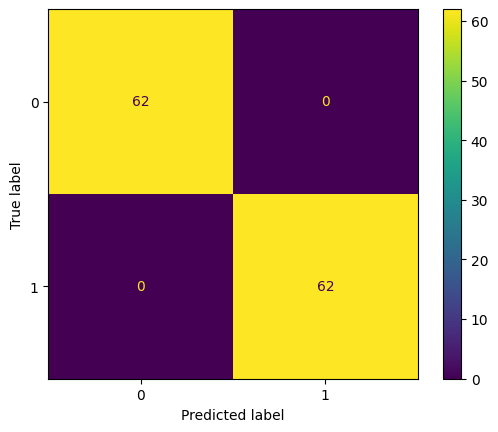

In [119]:
# Tr Confusion Matrix
predictions = knn.predict(X_train)
cm = confusion_matrix(y_train, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

KNN Assessment: 0.8518518518518519


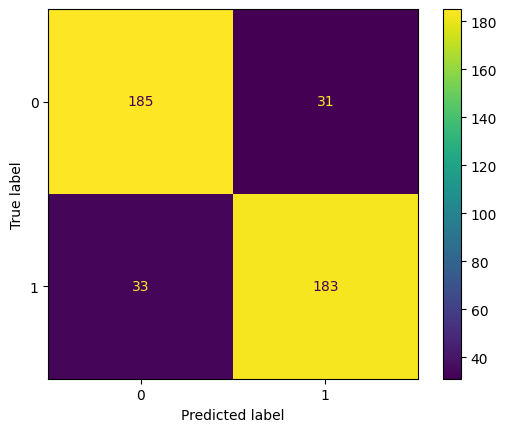

In [120]:
# Test
print("KNN Assessment: " + str(knn.score(X_test, y_test)))

# Ts Confusion Matrix
predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()